In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division

In [3]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100,:]

In [4]:
print(X.shape, y.shape, X_full.shape)

((100L, 2L), (100L,), (100L, 4L))


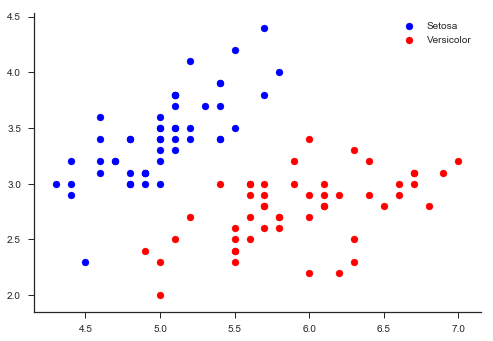

In [5]:
setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel = "Sepal Length"
plt.ylabel = "Sepal Width"
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

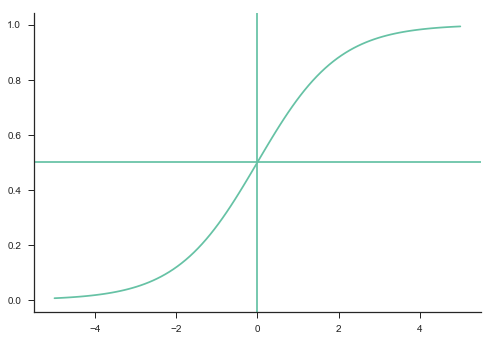

In [6]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

In [7]:
def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

In [8]:
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

In [9]:
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [10]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)

In [11]:
shape = X.shape[1]
y_flip = np.logical_not(y)
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)

[-1.52645347  1.39922382]
